In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

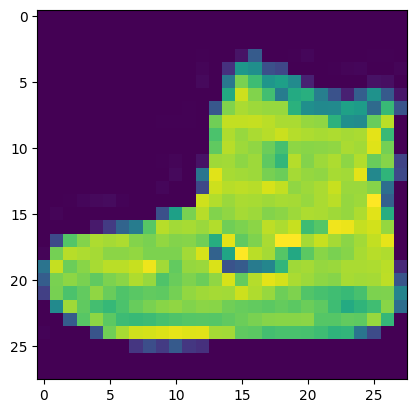

In [5]:
plt.imshow(train_data[0]);

In [6]:
train_labels[0]

9

In [7]:
class_names=['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'sneaker', 'Bag', 'Ankle boot']

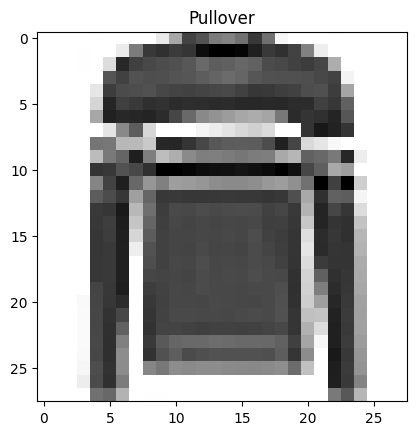

In [8]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]]);

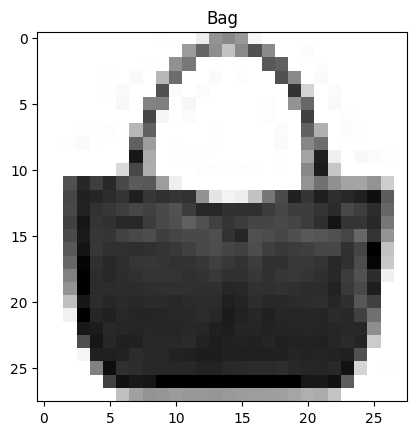

In [9]:
plt.imshow(train_data[100], cmap=plt.cm.binary)
plt.title(class_names[train_labels[100]]);

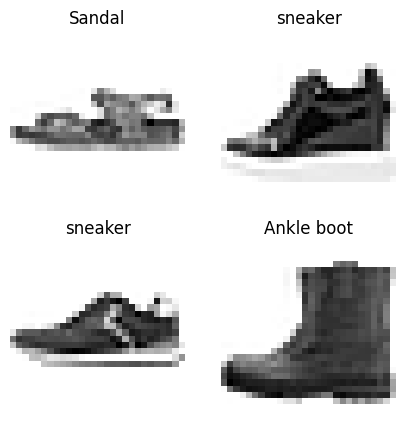

In [10]:
import random
plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [11]:
from keras.activations import activation_layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3198 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3022 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.319817,0.098233,2.302650,0.1
1,2.302745,0.098483,2.302166,0.1
2,2.302733,0.100217,2.302677,0.1
3,2.302787,0.097483,2.302622,0.1
4,2.302751,0.097267,2.302623,0.1
5,2.302783,0.099217,2.302635,0.1
6,2.302770,0.098700,2.302616,0.1
7,2.302794,0.098183,2.302668,0.1
8,2.302754,0.098917,2.302657,0.1
9,2.302793,0.098600,2.302652,0.1


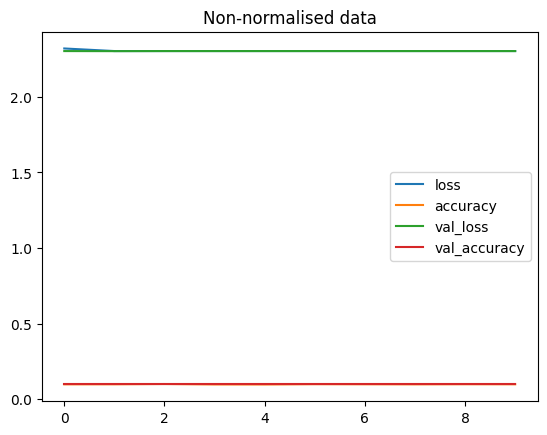

In [22]:
pd.DataFrame(history_1.history).plot(title="Non-normalised data");

### Improving by normalising the data
Neural network likes the data to be scaled or normalised

In [14]:
train_data.min(), train_data.max()

(0, 255)

In [15]:
train_data = train_data/255
test_data = test_data/255

In [16]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2411 - accuracy: 0.5255 - val_loss: 0.7978 - val_accuracy: 0.7106
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6937 - accuracy: 0.7526 - val_loss: 0.6681 - val_accuracy: 0.7524
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6131 - accuracy: 0.7723 - val_loss: 0.6317 - val_accuracy: 0.7622
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5856 - accuracy: 0.7802 - val_loss: 0.6166 - val_accuracy: 0.7672
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5701 - accuracy: 0.7838 - val_loss: 0.6066 - val_accuracy: 0.7707
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5576 - accuracy: 0.7882 - val_loss: 0.6033 - val_accuracy: 0.7738
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5502 - accuracy: 0.7901 - val_loss: 0.5884 - val_accuracy:

In [18]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,1.241146,0.525533,0.797822,0.7106
1,0.693689,0.752550,0.668070,0.7524
2,0.613067,0.772333,0.631669,0.7622
3,0.585601,0.780167,0.616592,0.7672
4,0.570113,0.783833,0.606592,0.7707
5,0.557614,0.788200,0.603337,0.7738
6,0.550152,0.790133,0.588447,0.7765
7,0.542542,0.793500,0.591693,0.7806
8,0.537146,0.796783,0.585182,0.7819
9,0.532516,0.798517,0.577189,0.7883


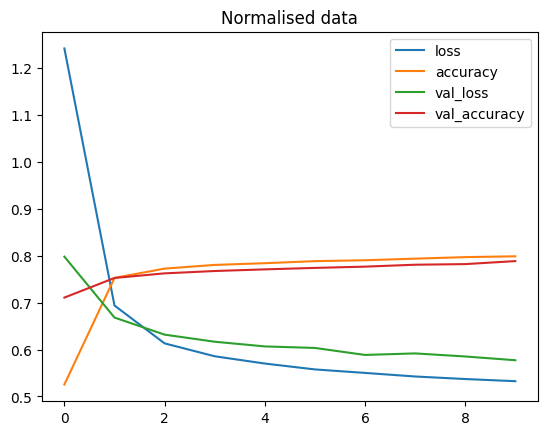

In [24]:
pd.DataFrame(history_2.history).plot(title='Normalised data');